In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from ipywidgets import (fixed,
                        interact,
                        interactive)

In [ ]:
def modelo_logistico(r=5, K=100):
    plt.figure()
    x = np.linspace(0, K, num=1000)
    plt.ylim(0, r*K/4+2)
    plt.plot(x, r*x*(1-x/K))
    plt.show()

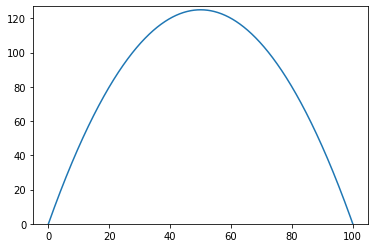

In [ ]:
modelo_logistico()

Quiero que grafiquen estas dos funciones:

$$F(N|r, K) = rN(1-\frac{N}{K}) $$

$$H(N|q, E) = qEN$$

In [ ]:
def modelo_con_pesca(q, E, r=5, K=100):
    plt.figure()
    x = np.linspace(0, K, num=1000)
    puntos_equilibrio = np.array([
        [0, 0],
        [K*(1-q*E/r), 0]
    ])
    plt.ylim(0, r*K/4+2)
    plt.plot(x, r*x*(1-x/K))
    plt.plot(x, q*E*x)
    plt.scatter(puntos_equilibrio[:, 0], puntos_equilibrio[:, 1], c='r')

    plt.show()

interactive_plot = interactive(modelo_con_pesca, 
                               q=(0., 1.), 
                               E=(0.,11.),
                               r=fixed(5),
                               K=fixed(100))
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='q', max=1.0), FloatSlider(value=5.5, description='E'…

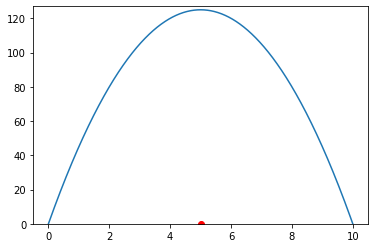

In [ ]:
def rendimiento_h2(q=0.5, E=3., r=5, K=100):
    plt.figure()
    E = np.linspace(0, r/q, num=1000)
    plt.ylim(0, r*K/4+2)
    plt.plot(E, q*E*K*(1-q*E/r))
    plt.scatter(r/(2*q), 0, c='red')
    plt.show()

rendimiento_h2()

In [ ]:
def modelo2_con_pesca(q, E, r=5, Nc=20, K=100):
    plt.figure()
    N = np.linspace(0, K, num=1000)
    plt.ylim(-25, 300)
    plt.plot(N, r*N*(N/Nc-1)*(1-N/K))
    plt.plot(N, q*E*N)
    plt.show()

interactive_plot = interactive(modelo2_con_pesca, 
                               q=(0., 1.), 
                               E=(0.,11.),
                               r=fixed(5),
                               K=fixed(100),
                               Nc=fixed(20))
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='q', max=1.0), FloatSlider(value=5.5, description='E'…

### Lotka-Volterra
$$
    \frac{\textrm{d}x}{\textrm{d}t} = rx-axy
$$
$$
    \frac{\textrm{d}y}{\textrm{d}t} = bxy+ky
$$
los parámetros que voy a considerar $r=10$, $a=3$, $k=5$ y $b=2$.
Los puntos de equilibrio estarán dados por
  - (0, 0)
  - (5/2, 10/3)

Dibujaré el plano fase

In [2]:
def f(x, y, r=10, a=3):
    return r*x-a*x*y

def g(x, y, k=5, b=2):
    return b*x*y-k*y

In [5]:
x = np.linspace(0, 7, 15)
y = np.linspace(0, 10, 15)
X, Y = np.meshgrid(x, y)

dX = f(X, Y)
dY = g(X, Y)

In [4]:
ptos_equilibrio = np.array([[0, 0], [5/2, 10/3]])

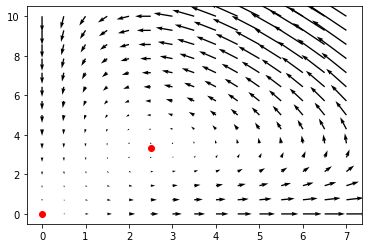

In [7]:
plt.quiver(X, Y, dX, dY)
plt.scatter(ptos_equilibrio[:, 0], ptos_equilibrio[:, 1], c='r')